In [2267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2268]:
Data = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')

## Train Test Split

In [2269]:
X_train, X_test,Y_train,Y_test = train_test_split(Data.iloc[:,:7],Data.iloc[:,-1] ,test_size=0.3, random_state=42)
X_train.to_csv('Mobile-Price-Prediction-cleaned_data_train.csv', index=False)
X_test.to_csv('Mobile-Price-Prediction-cleaned_data_test.csv', index=False)

In [2270]:
X=np.array(X_train)
Y=np.array(Y_train)
m,n=X.shape
ones_column = np.ones((X.shape[0], 1))
X_1 = np.concatenate((ones_column, X), axis=1)
X_T=X_1.T
XT_X = np.dot(X_T, X_1)
XT_X_inv = np.linalg.inv(XT_X)
XT_Y = np.dot(X_T,Y)

## 1.Close Form Solution


In [2271]:

w_1=np.dot(XT_X_inv,XT_Y)
err=np.sum(pow(np.dot(X_1,w_1)-Y,2))/m
np.sqrt(err)


16159.683765149734

## 2.Gradient descent solution

In [2272]:
w_2 =  np.random.rand(7)
w_same=w_2
w_0=1
epochs=75
lr=0.001
X_T_GR=X.T
for i in range(epochs):
    y_pred = np.dot(X, w_2) + w_0
    error = Y-y_pred
    if(i>40):
        print(error[2])
    
    w_2_gradient = (1/m) * np.dot(X_T_GR, error)
    bias_gradient = (1/m) * np.sum(error)
    w_2 = w_2- lr * w_2_gradient
    w_0 = w_0- lr * bias_gradient
    
print(f"Optimized weights (w_2): {w_2}")
print(f"Optimized bias: {w_0}")
err_gd=np.sum(pow((np.dot(X,w_2)+w_0)-Y,2))/m
np.sqrt(err_gd)









1.8861681267455833e+170
2.1774515818161905e+174
2.5137183286701583e+178
2.9019151969486556e+182
3.350061824443397e+186
3.867416332287668e+190
4.4646665855877e+194
5.154150990687973e+198
5.9501133904521825e+202
6.868997323361829e+206
7.929785725439133e+210
9.154393092790247e+214
1.0568118206332104e+219
1.2200166771401633e+223
1.4084254769295588e+227
1.6259304985192095e+231
1.8770251101806403e+235
2.166896597030048e+239
2.501533323530511e+243
2.887848445242093e+247
3.3338227255422187e+251
3.848669407722334e+255
4.4430245485019564e+259
5.129166745000721e+263
5.921270794439257e+267
6.835700526845393e+271
7.891346860305076e+275
9.110018062535768e+279
1.051689028107421e+284
1.2141027649440949e+288
1.4015982713992283e+292
1.6180489585490423e+296
1.8679264134993422e+300
2.1563927765061892e+304
Optimized weights (w_2): [-2.4368042e+302            -inf            -inf            -inf
            -inf            -inf            -inf]
Optimized bias: -5.858953663699339e+301


nan

## Plotting predicted verses actual on test data

### Closed Form

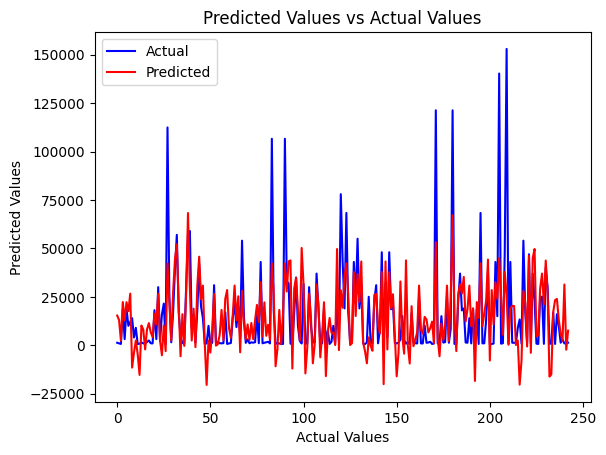

In [2273]:
Xt=np.array(X_test)
Ytest=np.array(Y_test)
onescolumn = np.ones((Xt.shape[0], 1))
Xtest = np.concatenate((onescolumn, Xt), axis=1)
ypredcf=np.dot(Xtest,w_1) 
plt.plot(Ytest, color='blue', label='Actual')
plt.plot( ypredcf, color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()


### Gradient descent

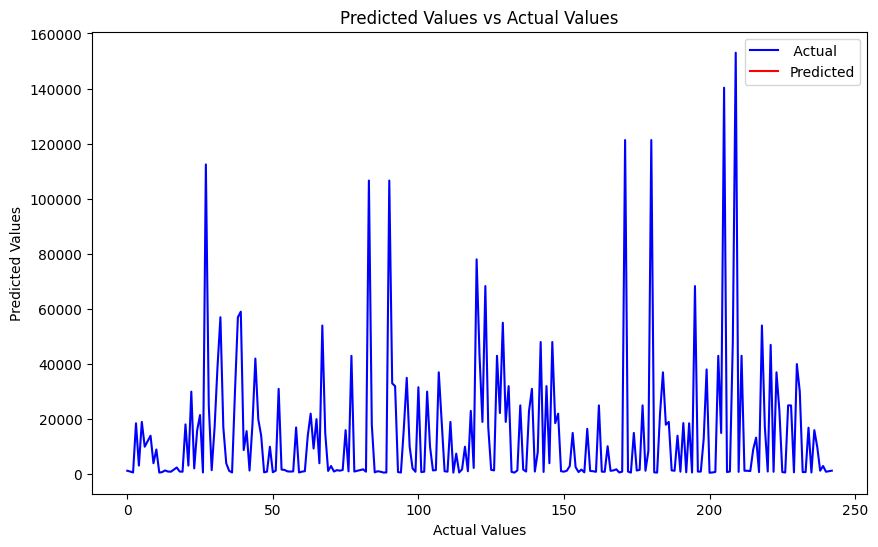

In [2274]:

ypred_gd=np.dot(Xt,w_2)+w_0 
plt.figure(figsize=(10, 6))
plt.plot(Ytest, color='blue', label=' Actual')
plt.plot(ypred_gd,color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()

## Closed form with l2 regularisation

In [2275]:
lemda=0.001
I= np.eye(8)
XT_X_inv_l2 = np.linalg.inv(XT_X+(lemda*I))
XT_Y = np.dot(X_T,Y)
w_1_l2=np.dot(XT_X_inv_l2,XT_Y)
err_cf_l2=np.sum(pow(np.dot(X_1,w_1_l2)-Y,2))/m
np.sqrt(err_cf_l2)





16159.683970088707

## Gradient descent with l2 regularisation

In [2276]:
w_2_l2 = w_same
w_0_l2=0
for i in range(epochs):
    y_pred_l2 = np.dot(X, w_2_l2) + w_0_l2
    error = y_pred_l2 - Y
    w_2_gradient_l2 = (1/m) * np.dot(X_T_GR, error)
    bias_gradient_l2 = (1/m) * np.sum(error)
    w_2_l2 = w_2_l2*(1-(lr*lemda))- (lr * w_2_gradient_l2)
    w_0_l2 -= lr * bias_gradient_l2
print(f"Optimized weights (w_2): {w_2_l2}")
print(f"Optimized bias: {w_0_l2}")
err_gd_l2=np.sum(pow((np.dot(X,w_2_l2)+w_0_l2)-Y,2))/m
np.sqrt(err_gd_l2)






Optimized weights (w_2): [2.40550021e+302             inf             inf             inf
             inf             inf             inf]
Optimized bias: 5.78368762667627e+301


nan

## Plot with l2 Regularization

### Closed form

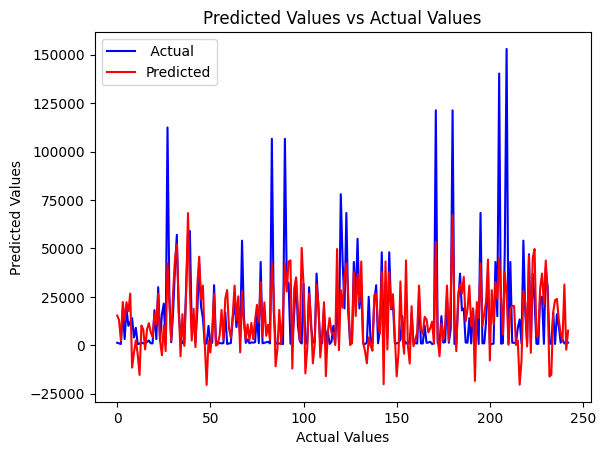

In [2277]:

ypredcf_l2=np.dot(Xtest,w_1_l2) 
plt.plot(Ytest, color='blue', label=' Actual')
plt.plot( ypredcf_l2, color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()



### Gradient Descent

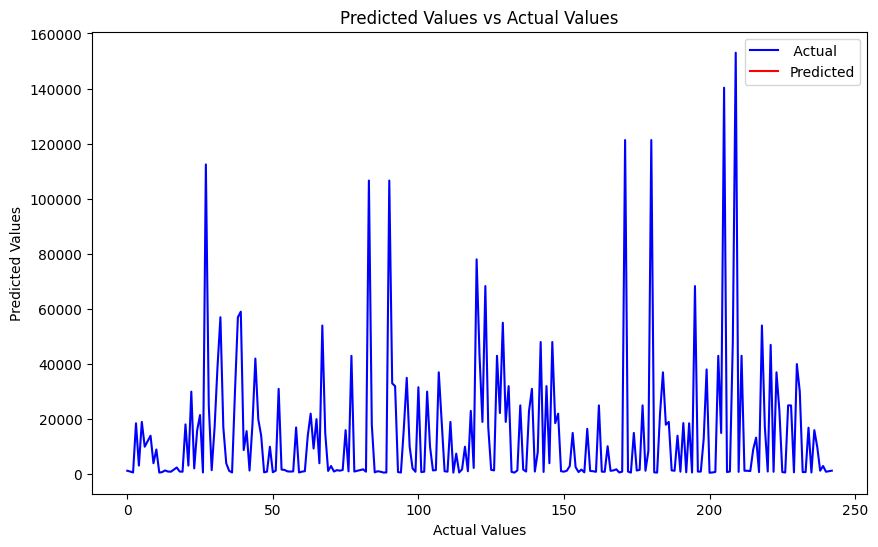

In [2278]:

ypred_gd_l2=np.dot(Xt,w_2_l2)+w_0_l2 
plt.figure(figsize=(10, 6))
plt.plot(Ytest, color='blue', label=' Actual')
plt.plot( ypred_gd_l2, color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()


## Closed form solution and gradient descent with standarised l2 regularisation

In [2279]:
X_T_S=X.T
X_means=np.mean(X_T_S,axis=1)
X_std = np.std(X_T_S, axis=1)
for i in range(n):
    X_T_S[i]=(X_T_S[i]-X_means[i])/X_std[i]
X_ST=X_T_S.T
X_save=X_ST
X_ST = np.concatenate((ones_column, X_ST), axis=1)
X_T_ST=X_ST.T
XT_X_ST = np.dot(X_T_ST, X_ST)
XT_X_ST_inv_l2 = np.linalg.inv(XT_X_ST+(lemda*I))
XT_Y_ST = np.dot(X_T_ST,Y)
w_1_l2_ST=np.dot(XT_X_ST_inv_l2,XT_Y_ST)
err_cf_l2_ST=np.sum(pow(np.dot(X_ST,w_1_l2_ST)-Y,2))/m
np.sqrt(err_cf_l2_ST)









16159.683765184362

In [2280]:
X_gd_T_ST=X_save.T
w_2_l2_ST=w_same
w_0_l2_ST=0
for i in range(epochs):
    y_pred_l2_ST = np.dot(X_save, w_2_l2_ST) + w_0_l2_ST
    error = y_pred_l2_ST - Y
    w_2_gradient_l2_ST = (1/m) * np.dot(X_gd_T_ST, error)
    bias_gradient_l2_ST = (1/m) * np.sum(error)
    w_2_l2_ST = w_2_l2_ST*(1-(lr*lemda))- (lr * w_2_gradient_l2_ST)
    w_0_l2_ST -= lr * bias_gradient_l2_ST
print(f"Optimized weights (w_2): {w_2_l2_ST}")
print(f"Optimized bias: {w_0_l2}")
err_gd_l2_ST=np.sum(pow((np.dot(X,w_2_l2_ST)+w_0_l2_ST)-Y,2))/m
np.sqrt(err_gd_l2_ST)

Optimized weights (w_2): [ 906.48130557  472.88232754  732.74276224  193.71881099 -344.7078179
   30.09429505  574.34703741]
Optimized bias: 5.78368762667627e+301


24728.81061226214

## Plot with standarised l2 regularisation

### Closed form

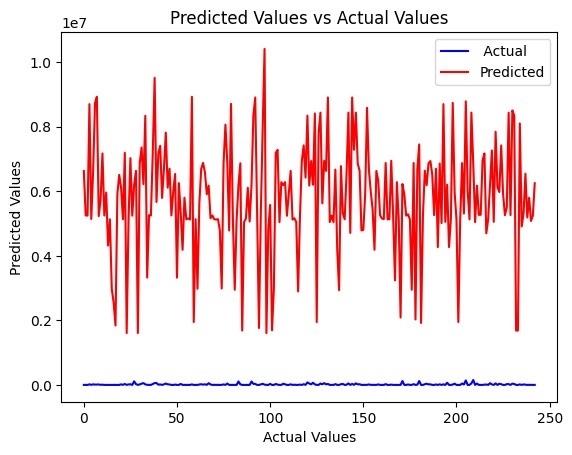

In [2281]:
ypredcf_l2_ST=np.dot(Xtest,w_1_l2_ST) 
plt.plot(Ytest, color='blue', label=' Actual')
plt.plot( ypredcf_l2_ST, color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()

### Gradient descent

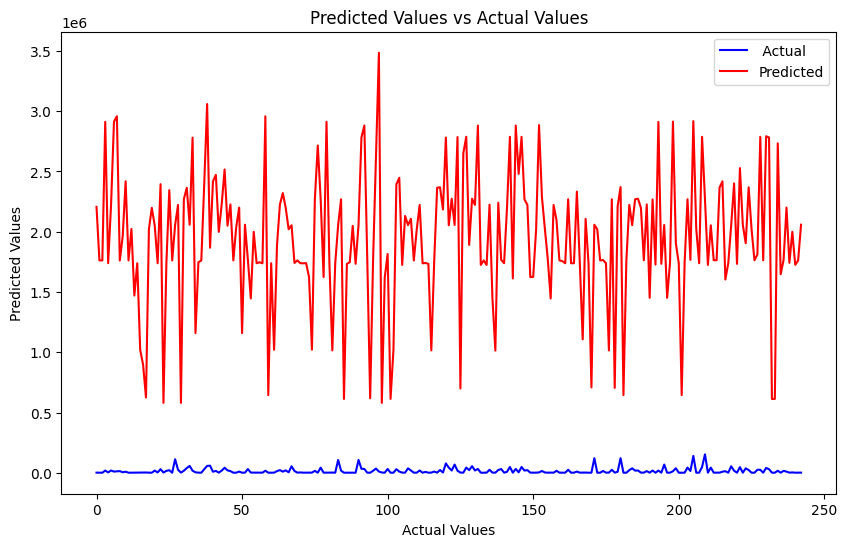

In [2282]:
ypred_gd_l2_ST=np.dot(Xt,w_2_l2_ST)+w_0_l2_ST
plt.figure(figsize=(10, 6))
plt.plot(Ytest, color='blue', label=' Actual')
plt.plot( ypred_gd_l2_ST, color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()

## Plot of predicted verses actual on test data by varying λ values

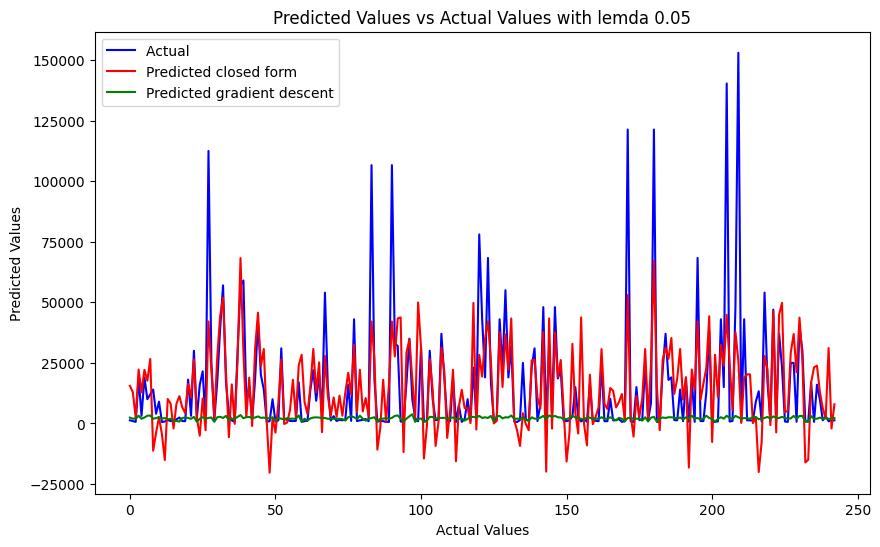

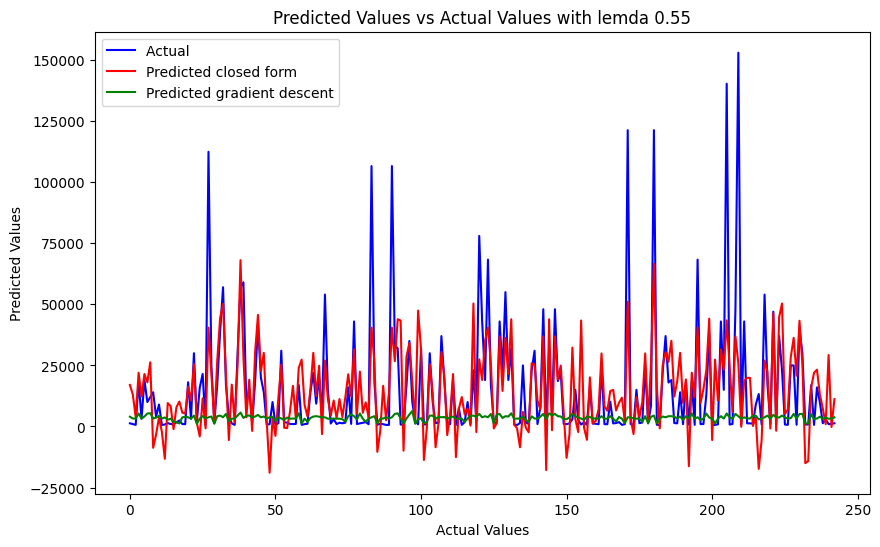

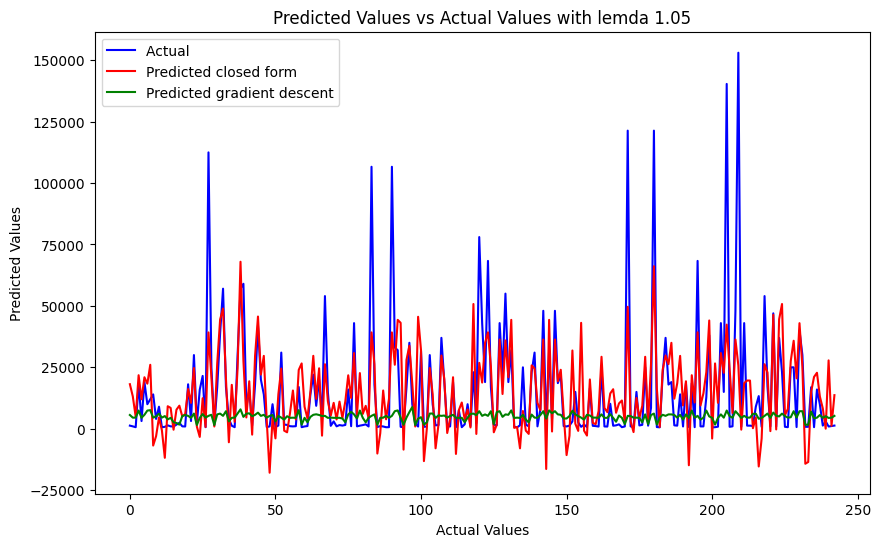

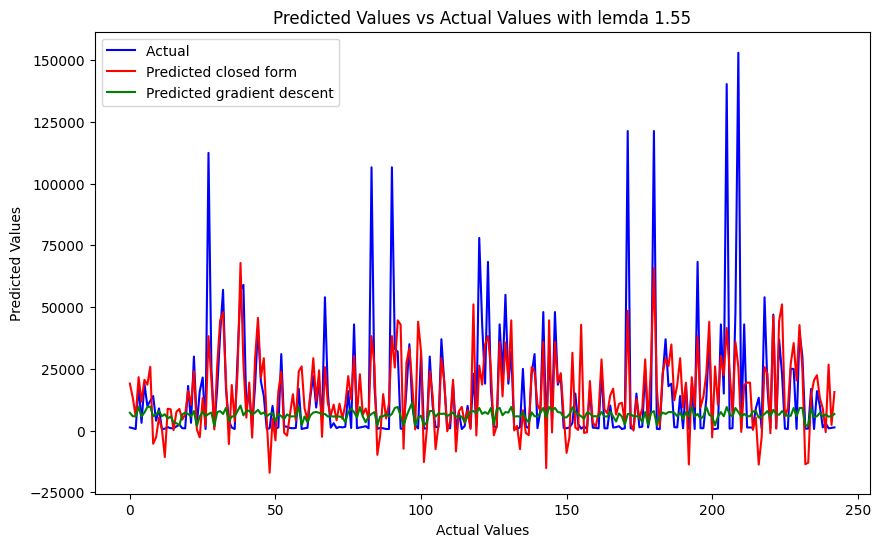

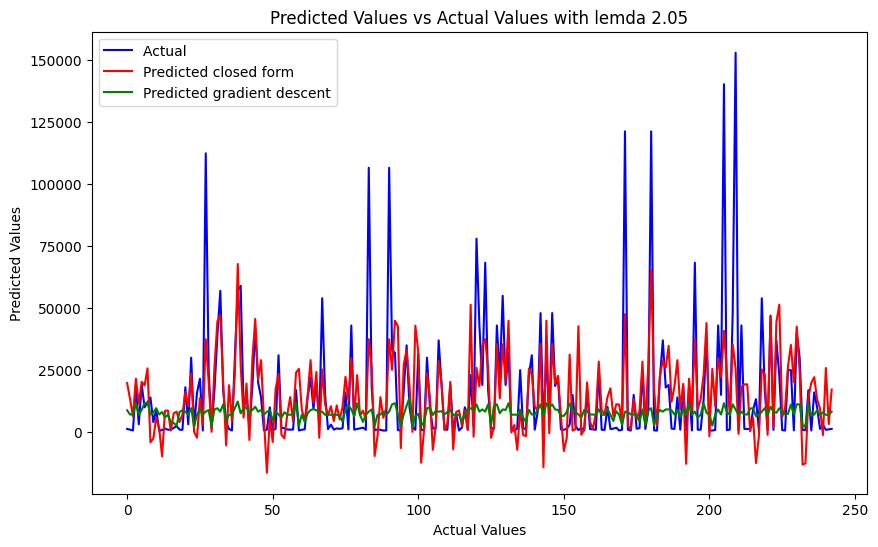

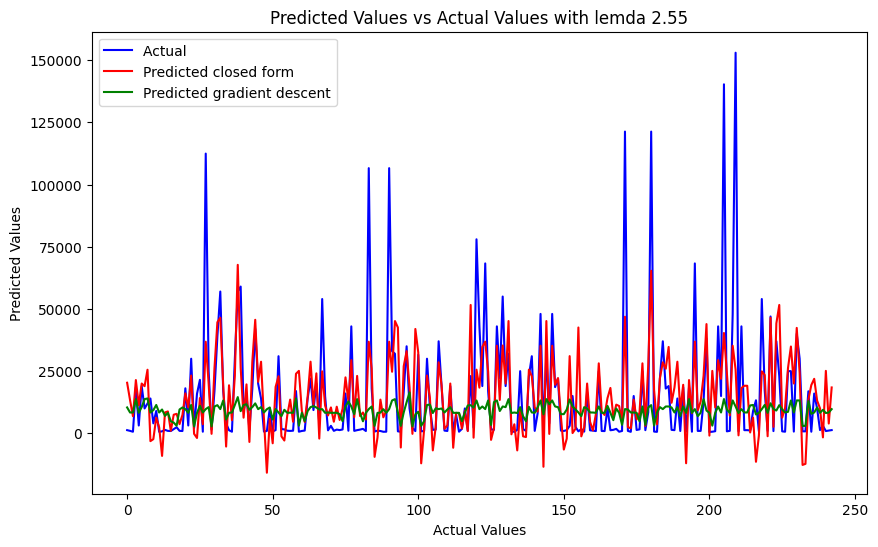

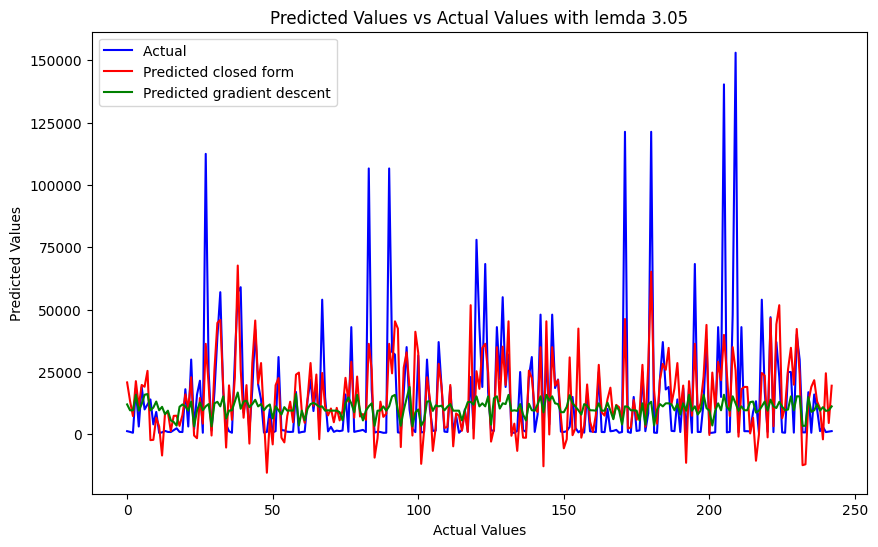

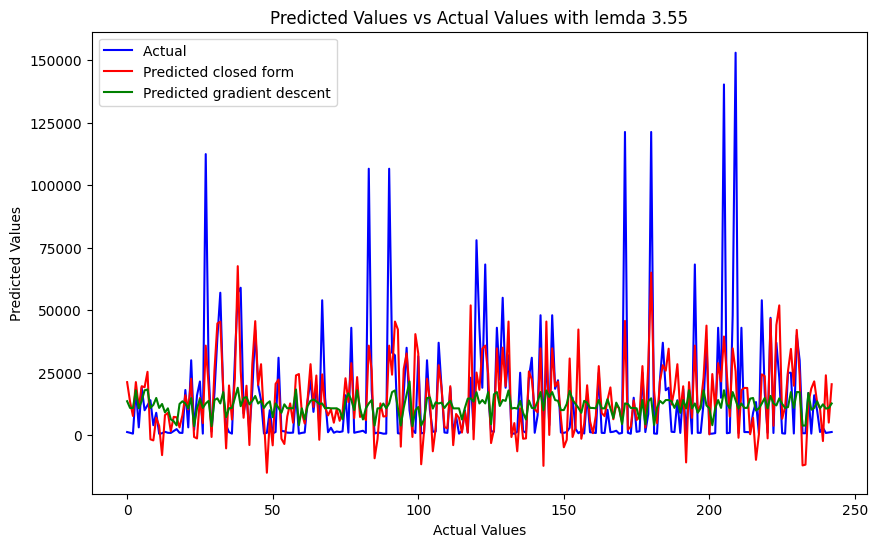

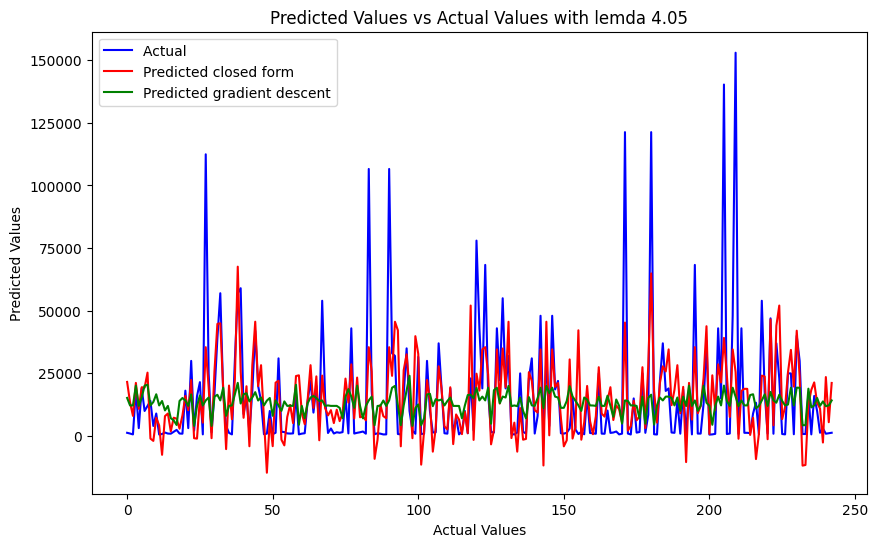

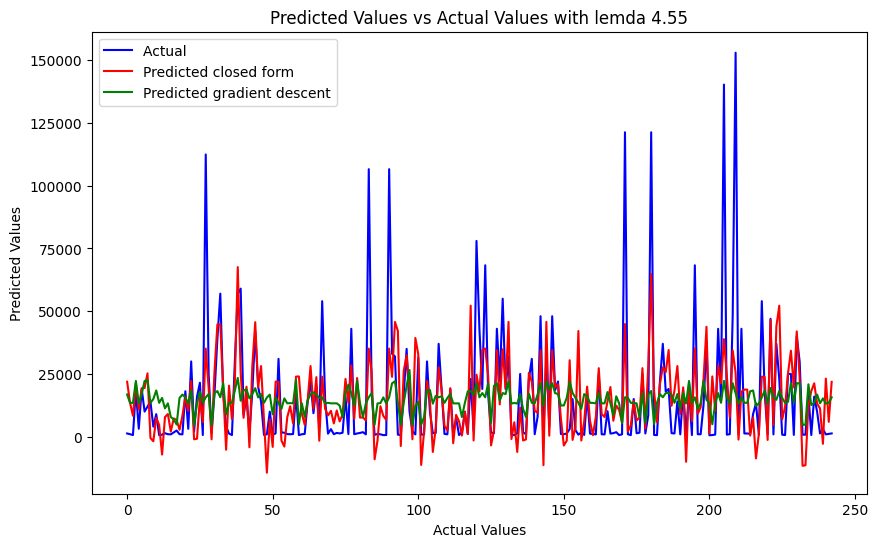

In [2283]:
ep=10
epoch=500
l=0.05
lr=0.0000001
w_2_l2_var = w_same
w_0_l2_var=0
for j in range(ep):
    XT_X_inv_l2_var = np.linalg.inv(XT_X+(l*I))
    w_1_l2_var=np.dot(XT_X_inv_l2_var,XT_Y)
    for i in range(epoch):
        y_pred_l2_var = np.dot(X, w_2_l2_var) + w_0_l2_var
        error = y_pred_l2_var - Y
        w_2_gradient_var = (1/m) * np.dot(X_T_GR, error)
        bias_gradient_var = (1/m) * np.sum(error)
        
        w_2_l2_var = w_2_l2_var*(1-(lr*l))- (lr * w_2_gradient_var)
        w_0_l2_var -= lr * bias_gradient_var
    ypredcf_l2_var=np.dot(Xtest,w_1_l2_var) 
    ypred_gd_l2_var=np.dot(Xt,w_2_l2_var)+w_0_l2_var 
    plt.figure(figsize=(10, 6))
    plt.plot(Ytest, color='blue', label='Actual ')
    plt.plot(ypredcf_l2_var, color='red', label='Predicted closed form ')
    plt.plot(ypred_gd_l2_var, color='green', label='Predicted gradient descent')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted Values vs Actual Values with lemda {l}')
    plt.legend()
    l+=0.5